In [42]:
# just some imports to be used later
import os
import pandas as pd
from zipfile import ZipFile
import nltk
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn

# Getting the Dataset
Dataset sourced from Kaggle, [McDonald's Store Reviews](https://www.kaggle.com/datasets/nelgiriyewithana/mcdonalds-store-reviews)

<b>For first time usage:
    
1. Use: <i>pip install kaggle</i> or conda installation to install Kaggle API
1. Go to Kaggle > Settings > API > Create New Token
1. Copy the downloaded JSON to appropriate location (In windows: C:\Users\your_name\\\.kaggle)


In [2]:
# Get dataset
!kaggle datasets download "nelgiriyewithana/mcdonalds-store-reviews"


  0%|          | 0.00/1.78M [00:00<?, ?B/s]
 56%|#####6    | 1.00M/1.78M [00:00<00:00, 1.41MB/s]
100%|##########| 1.78M/1.78M [00:00<00:00, 2.04MB/s]
100%|##########| 1.78M/1.78M [00:00<00:00, 1.90MB/s]


In [3]:
# Extract zip file
with ZipFile('mcdonalds-store-reviews.zip','r') as zipped_file:
    zipped_file.extractall()

In [4]:
# Delete the zipfile
os.remove('mcdonalds-store-reviews.zip')

# The Dataset

In [5]:
# Read Dataset
og_data = pd.read_csv('McDonald_s_Reviews.csv',encoding_errors='ignore')
og_data.head()

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4 stars
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1 star
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was �����������...,5 stars
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1 star


The dataset has multiple columns but for my experiment, I only need the review and the rating. Dropping everything else.

In [6]:
#drop columns
dropcols_data = og_data[['review','rating']].copy()
dropcols_data.head()

,review,rating
0,Why does it look like someone spit on my food?...,1 star
1,It'd McDonalds. It is what it is as far as the...,4 stars
2,Made a mobile order got to the speaker and che...,1 star
3,My mc. Crispy chicken sandwich was �����������...,5 stars
4,"I repeat my order 3 times in the drive thru, a...",1 star


In [7]:
# change star rating to integer
dropcols_data['rating'] = dropcols_data['rating'].apply(lambda x: int(x.split()[0]))
dropcols_data.head()

,review,rating
0,Why does it look like someone spit on my food?...,1
1,It'd McDonalds. It is what it is as far as the...,4
2,Made a mobile order got to the speaker and che...,1
3,My mc. Crispy chicken sandwich was �����������...,5
4,"I repeat my order 3 times in the drive thru, a...",1


In [8]:
# Raw dataset
dropcols_data.count()

review    33385
rating    33396
dtype: int64

In [9]:
# Ratings without reviews
no_rev = list(dropcols_data.index[dropcols_data['review'].isna()])
print(f'Total ratings with no reviews: {len(no_rev)}')

# drop ratings with no reviews
dropcols_data = dropcols_data.drop(no_rev)
print(dropcols_data.count())

Total ratings with no reviews: 11
review    33385
rating    33385
dtype: int64


In [10]:
# Neutral reviews
ratings_3star = list(dropcols_data.index[dropcols_data['rating']==3])
print(f'Number of neutral ratings: {len(ratings_3star)}')

# drop neutral 3 star reviews
dropcols_data = dropcols_data.drop(ratings_3star)
dropcols_data.count()

Number of neutral ratings: 4814


review    28571
rating    28571
dtype: int64

In [11]:
#chnage rating to label, 1: positive and 0:negative
dropcols_data['Sentiment'] = dropcols_data['rating'].apply(lambda x: 1 if x>3 else 0)
dataset = dropcols_data[['review','Sentiment']].copy()
dataset.head()

,review,Sentiment
0,Why does it look like someone spit on my food?...,0
1,It'd McDonalds. It is what it is as far as the...,1
2,Made a mobile order got to the speaker and che...,0
3,My mc. Crispy chicken sandwich was �����������...,1
4,"I repeat my order 3 times in the drive thru, a...",0


# Preprocessing the dataset

In [12]:
# Lower case
dataset['preprocessed_review'] = dataset['review'].apply(lambda sentence: sentence.lower())
dataset.head()

,review,Sentiment,preprocessed_review
0,Why does it look like someone spit on my food?...,0,why does it look like someone spit on my food?...
1,It'd McDonalds. It is what it is as far as the...,1,it'd mcdonalds. it is what it is as far as the...
2,Made a mobile order got to the speaker and che...,0,made a mobile order got to the speaker and che...
3,My mc. Crispy chicken sandwich was �����������...,1,my mc. crispy chicken sandwich was �����������...
4,"I repeat my order 3 times in the drive thru, a...",0,"i repeat my order 3 times in the drive thru, a..."


In [13]:
# Tokenization
nltk.download('punkt') # if error
tokenizer = nltk.tokenize.WhitespaceTokenizer()
dataset['preprocessed_review'] = dataset['preprocessed_review'].apply(lambda x: tokenizer.tokenize(x))
dataset.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jatin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,review,Sentiment,preprocessed_review
0,Why does it look like someone spit on my food?...,0,"[why, does, it, look, like, someone, spit, on,..."
1,It'd McDonalds. It is what it is as far as the...,1,"[it'd, mcdonalds., it, is, what, it, is, as, f..."
2,Made a mobile order got to the speaker and che...,0,"[made, a, mobile, order, got, to, the, speaker..."
3,My mc. Crispy chicken sandwich was �����������...,1,"[my, mc., crispy, chicken, sandwich, was, ����..."
4,"I repeat my order 3 times in the drive thru, a...",0,"[i, repeat, my, order, 3, times, in, the, driv..."


In [14]:
# Handle Removal
# Not needed in this usecase but for tweets or other cases might be usefull.

In [15]:
# Stop word removal
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
dataset['preprocessed_review'] = dataset['preprocessed_review'].apply(lambda tokens: [t for t in tokens if t not in stopwords])
dataset.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jatin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,review,Sentiment,preprocessed_review
0,Why does it look like someone spit on my food?...,0,"[look, like, someone, spit, food?, normal, tra..."
1,It'd McDonalds. It is what it is as far as the...,1,"[it'd, mcdonalds., far, food, atmosphere, go.,..."
2,Made a mobile order got to the speaker and che...,0,"[made, mobile, order, got, speaker, checked, i..."
3,My mc. Crispy chicken sandwich was �����������...,1,"[mc., crispy, chicken, sandwich, �������������..."
4,"I repeat my order 3 times in the drive thru, a...",0,"[repeat, order, 3, times, drive, thru,, still,..."


In [16]:
# Stemming or Lemmatization
nltk.download('wordnet')
lemmatizer = nltk.stem.WordNetLemmatizer()
dataset['preprocessed_review'] = dataset['preprocessed_review'].apply(lambda tokens: [lemmatizer.lemmatize(t) for t in tokens])
dataset.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jatin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,review,Sentiment,preprocessed_review
0,Why does it look like someone spit on my food?...,0,"[look, like, someone, spit, food?, normal, tra..."
1,It'd McDonalds. It is what it is as far as the...,1,"[it'd, mcdonalds., far, food, atmosphere, go.,..."
2,Made a mobile order got to the speaker and che...,0,"[made, mobile, order, got, speaker, checked, i..."
3,My mc. Crispy chicken sandwich was �����������...,1,"[mc., crispy, chicken, sandwich, �������������..."
4,"I repeat my order 3 times in the drive thru, a...",0,"[repeat, order, 3, time, drive, thru,, still, ..."


In [17]:
# split into training and testing data
train, test = train_test_split(dataset,test_size=0.2,random_state=2048)
print('Train:')
print(train.count())

print('Test:')
print(test.count())

Train:
review                 22856
Sentiment              22856
preprocessed_review    22856
dtype: int64
Test:
review                 5715
Sentiment              5715
preprocessed_review    5715
dtype: int64


# Feature Extraction

In [18]:
# find distinct words and initialize with 0 freq
distinct_words = []
for review in list(train['preprocessed_review']):
    distinct_words.extend(review)
distinct_words = list(set(distinct_words))
init_freq = [0]*len(distinct_words)
word_freq_table = pd.DataFrame({'positive_freq':init_freq,'negative_freq':init_freq},index=distinct_words)
word_freq_table

,positive_freq,negative_freq
planted,0,0
"md,s",0,0
lookup,0,0
perfectly,0,0
buns!,0,0
...,...,...
arrive,0,0
father,0,0
excessively,0,0
"idea,",0,0


In [19]:
# count positive and negative frequencies or read already calculated frequencies
if not os.path.exists('./McDonald_s_Reviews_freqtbl.csv'):
    #positive frequency
    positive_revs = train[train['Sentiment']==1]
    for rev in positive_revs['preprocessed_review']:
        for token in rev:
            word_freq_table.at[token,'positive_freq'] = word_freq_table.at[token,'positive_freq'] +1
    #negative frequency
    negative_revs = train[train['Sentiment']==0]
    for rev in negative_revs['preprocessed_review']:
        for token in rev:
            word_freq_table.at[token,'negative_freq'] = word_freq_table.at[token,'negative_freq'] +1
    #save so there is no need to calculate again, don't forget to delete the file if making changes above this line
    word_freq_table.to_csv('./McDonald_s_Reviews_freqtbl.csv')
else:
    word_freq_table = pd.read_csv('./McDonald_s_Reviews_freqtbl.csv',index_col=0)
word_freq_table.head()

,positive_freq,negative_freq
stream,0,1
h,3,2
9:49am,0,2
canceled.,0,2
saggy,1,2


In [20]:
# Find feature vector for a review
def calculateFeatureVector(tokens,freqTable):
    featureVector = np.array([1,0,0])
    for token in tokens:
        if token in freqTable.index:
            featureVector[1] += freqTable.at[token,'positive_freq']
            featureVector[2] += freqTable.at[token,'negative_freq']
        else:
            print(f'warning! {token} not found')
    return featureVector

train['features'] = train['preprocessed_review'].apply(lambda tokens: calculateFeatureVector(tokens,word_freq_table))
train.head()

warning! nan not found


,review,Sentiment,preprocessed_review,features
26430,"Worst one I've ever been to! They were rude, a...",0,"[worst, one, i've, ever, to!, rude,, employee,...","[1, 1836, 5587]"
24357,Awful. 2AM visit. Only two workers. Took 30 mi...,0,"[awful., 2am, visit., two, workers., took, 30,...","[1, 4067, 9191]"
2349,"Exactly what you'd expect, from McDonald's, an...",1,"[exactly, expect,, mcdonald's,, 24, hours,, to...","[1, 277, 337]"
13817,It was cool definitely check it out!,1,"[cool, definitely, check, out!]","[1, 277, 248]"
5890,I honestly only went for a large French fry an...,0,"[honestly, went, large, french, fry, use, rest...","[1, 2503, 2429]"


<Axes: >

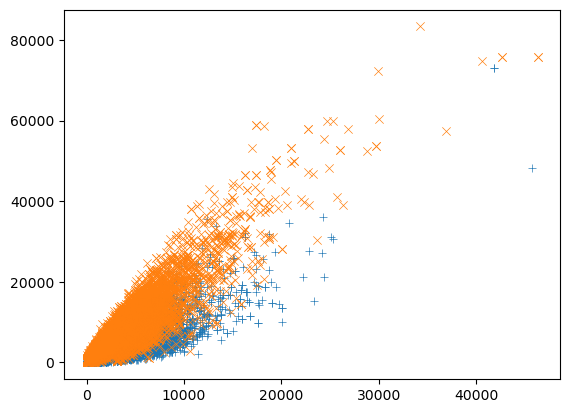

In [62]:
pos_vis_data = np.stack(train[train['Sentiment']==1]['features'])[:,1:]
neg_vis_data = np.stack(train[train['Sentiment']==0]['features'])[:,1:]
seaborn.scatterplot(x=pos_vis_data[:,0],y=pos_vis_data[:,1],marker='+')
seaborn.scatterplot(x=neg_vis_data[:,0],y=neg_vis_data[:,1],marker='x')

There's a visible pattern, and positive and negative reviews seem linearily seperable. However, there seems to be a big overlap in Positive and negative reviews.

# Train a model

In [ ]:
# Train Model

In [ ]:
# Training and validation results

In [ ]:
# Inference